In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

**Import data from kaggle**

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:07<00:00, 204MB/s]
100% 1.06G/1.06G [00:08<00:00, 141MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

**Import necessary libraries**

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

**Creating generators**

In [6]:
train_ds = keras.utils.image_dataset_from_directory(directory = '/content/train',
    labels = 'inferred', label_mode = 'int', batch_size = 32, image_size = (256,256))

validation_ds = keras.utils.image_dataset_from_directory(directory = '/content/test',
    labels = 'inferred', label_mode = 'int', batch_size = 32, image_size = (256,256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


**Normalizing the images (pixel values from 0 to 1)**

In [7]:
def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

**Creating CNN model**

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2,padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [10]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 83s 110ms/step - loss: 1.4077 - accuracy: 0.5774 - val_loss: 0.6248 - val_accuracy: 0.6542
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.6055 - accuracy: 0.6830 - val_loss: 0.5373 - val_accuracy: 0.7258
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5165 - accuracy: 0.7458 - val_loss: 0.5225 - val_accuracy: 0.7448
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4540 - accuracy: 0.7914 - val_loss: 0.4960 - val_accuracy: 0.7712
Epoch 5/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3970 - accuracy: 0.8230 - val_loss: 0.5202 - val_accuracy: 0.7652
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3449 - accuracy: 0.8489 - val_loss: 0.7371 - val_accuracy: 0.7320
Epoch 7/10
625/625 [==============================] - 69s 109ms/step - loss: 0.2776 - accuracy: 0.8821 - val_loss: 0.5309 - val_ac

*There are 625 batches (625 * 32 = 20,000)*

*Total number of images is 20,000*

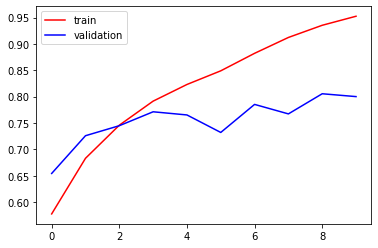

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

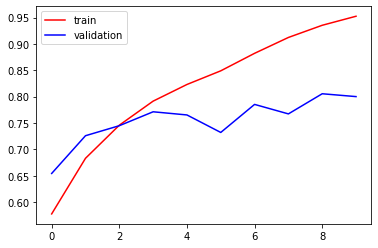

In [13]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue',label = 'validation')
plt.legend()
plt.show()

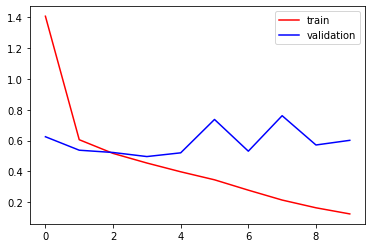

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

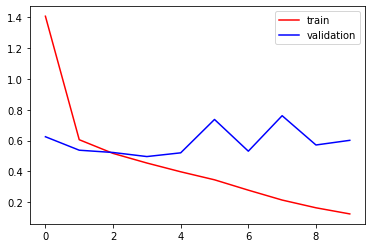

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

**Testing**

In [17]:
import cv2

In [18]:
test_img = cv2.imread('/content/cat.jpg')

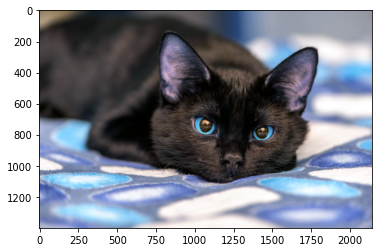

In [19]:
plt.imshow(test_img)

In [20]:
test_img.shape

(1400, 2141, 3)

In [21]:
test_img = cv2.resize(test_img,(256,256))

In [22]:
test_input = test_img.reshape((1, 256, 256, 3))

In [23]:
model.predict(test_input)

array([[1.]], dtype=float32)